Formation Edition numérique

# *OCR*
Simon Gabay

<img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" align="right"/>



Pour utiliser un logiciel, je dois l'installer. Il existe plusieurs possibiltés:
* [Calamari](https://github.com/Calamari-OCR/calamari)
* [Tesseract](https://github.com/tesseract-ocr/)
* [Kraken](https://github.com/mittagessen/kraken)

Dans ce cours, nous allons utiliser le dernier moteur OCR (anglais: _OCR engine_). Tous ont un fonctionnement très similaire – pour le débutant tout du moins.

Comme nombre d'outils, _Kraken_ est développé en python. La manière de l'installer est d'utiliser un gestionnaire de paquets (cf. [wikipedia.org](https://fr.wikipedia.org/wiki/Gestionnaire_de_paquets)) écrits en python: _Pip_ (cf. [wikipedia.org](https://fr.wikipedia.org/wiki/Pip_(gestionnaire_de_paquets)).

L'utilisation de _Colab_ permet d'éviter la création d'un environnement virtuel sur sa propre machine du type `virtualenv` (cf. [`pypi.org`](https://pypi.org/project/virtualenv/)). Sachez cependant que vous n'êtes pas obligé.e.s de travailler sur Colab: les commandes seront alors très proches de celles utilisées ici, mais quelques ajustements seront à prévoir.

In [11]:
!pip install kraken
#j'importe quelques librairies python pour le cours
import kraken

## 1 - Un premier essai

Pour filer la métaphore, un moteur OCR a besoin:
* D'une route pour rouler: des images à traiter
* Des pneus adaptés à cette route: un modèle OCR

On télécharge une image:

In [12]:
#Quelques remarques sur le code. Des commentaires sont ajoutés après le signe dièse (#)
#Plusieurs niveaux de code et plusieurs langages sont mélangés
#Les lignes commançant par une point d'exclamation sont une commande shell:
#elles ne sont pas exécutées par le kernel python
!mkdir img
#La ligne précédente, j'ai créé un dossier pour mettre les images (mkdir pour "make directory")
#On peut voir le dossier apparaître à gauche en cliquant sur l'icône "Fichiers"
#J'utilise cURL ("client URL request library") pour
!curl https://raw.githubusercontent.com/gabays/Cours_Edition_Geneve/master/Cours_01/Cours_01_exo/img/Collectif1660_recueil_bpt6k853407j_10.jpg --output img/10.jpg
#J'affiche la liste (ls pour "list") de ce que contient mon dossier
!ls

mkdir: cannot create directory ‘img’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191k  100  191k    0     0   399k      0 --:--:-- --:--:-- --:--:--  399k
eval_model.txt	img	  results      test.txt   val.txt
gt		material  sample_data  train.txt


On télécharge un modèle. Vous pouvez en télécharger un à cette adresse: 

https://drive.google.com/file/d/1DfYmJjSeImsU0XyPPVQcwtG92U_bztGp/view?usp=sharing

In [ ]:
#Je crée un dossier material
!mkdir material
#Il n'y a pas de point d'exclamation: maintenant je code en python
#J'importe une fonction toute faite, qui va me permettre d'importer des documents
from google.colab import files
#J'utilise la fonction que je viens d'importer
uploaded = files.upload()
#Je repasse à des commandes shell et je déplace le modèle que je viens d'importer dans le dossier material que je viens de créer
!mv OCR17.mlmodel material/

Saving OCR17.mlmodel to OCR17.mlmodel


**ATTENTION!** Un outil comme un modèle ne viennent pas de nulle part. Pensez à citer l'un et l'autre, souvent en reprenant une publication qui les documente.

1. Citer _Kraken_

```
@inproceedings{kiessling_kraken_2019,
	author = {Kiessling, Benjamin},
	title = {Kraken - an {Universal} {Text} {Recognizer} for the {Humanities}},
	address = {Utrecht, The Netherlands},
	month = jul,
	year = {2019},
	booktitle = {Digital {Humanities} {Conference} 2019 - {DH2019}},
	publisher = {Alliance of Digital Humanities Organizations (ADHO)},
	url = {https://dev.clariah.nl/files/dh2019/boa/0673.html}
}
```

2. Citer le modèle _OCR17_

```
@unpublished{gabay:hal-02577236,
  author = {Gabay, Simon and Cl{\'e}rice, Thibault and Reul, Christian},
  title = {{OCR17: Ground Truth and Models for 17th c. French Prints (and hopefully more)}},
  month = May,
  year = {2020},
  url = {https://hal.archives-ouvertes.fr/hal-02577236},
  note = {working paper or preprint}
}
```

In [ ]:
#Je crée un nouveau dossier results
!mkdir results
#J'utilise Kraken pour OCRiser l'image que j'ai téléchargée avec le modèle que j'ai téléchargé
#La commande fonctionne ainsi:
#Kraken est le nom du script
# -i permet de spécifier le fichier d'input (d'où -i)
# Notez que le nom du fichier est précédé/du/chemin pour accéder au fichier
# ensuite le nom du fichier qui contiendra la transcription
# ensuite les options que j'utilise: je binarise, je segmente et j'OCRise l'image
# -m permet de spécifier le nom du modèle utilisé
!kraken -i /content/img/10.jpg /content/results/ocr_result.txt binarize segment ocr -m /content/material/OCR17.mlmodel

2020-06-20 21:31:41.706560: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpoihbmhur	✓


Je peux regarder le résultat de l'OCRisation

<img src="https://raw.githubusercontent.com/gabays/Cours_Edition_Geneve/master/Cours_01/Cours_01_exo/img/Collectif1660_recueil_bpt6k853407j_10.jpg" width="30%" align="left"/>


In [ ]:
#J'utilise la commande cat ("catenate") pour afficher la transcription
!cat /content/results/ocr_result.txt

5
Acante.
Cette Poire & cet Abricot,
Ma mignonne, ne diſoient mot:
Mais toy, tu te chantes toy meſme,
Et mon orgueil ſeroit extréme.
Si ie pretendois par mes vers
Eſgaler tes charmans concers
Four vn deſſein ſi temeraire,
Lambert meſme, & ſa ſœur Hilaire,
N’en ſçauent pas encore aſſez:
Deux Rosignols ces iours paſſe,
A C1
Se le mirent en ſantaiſie,
L’vn en creua de ialouſie,
Se voyant par toy ſurmonter,
Et l’autre en creua de chanter¬
La Fauuette.
Il n’en eſt rien, mais ie l’auoue,
Faux ou vray, i’ye qu’on me loue:
Chacun eſt de meſme, ie croy,
Parle donc, que eux-tu de moy
¬ 
 Acante.

## 2 - Fonctionnement avancé (Sous le capot)

Nous travaillons avec cette image:

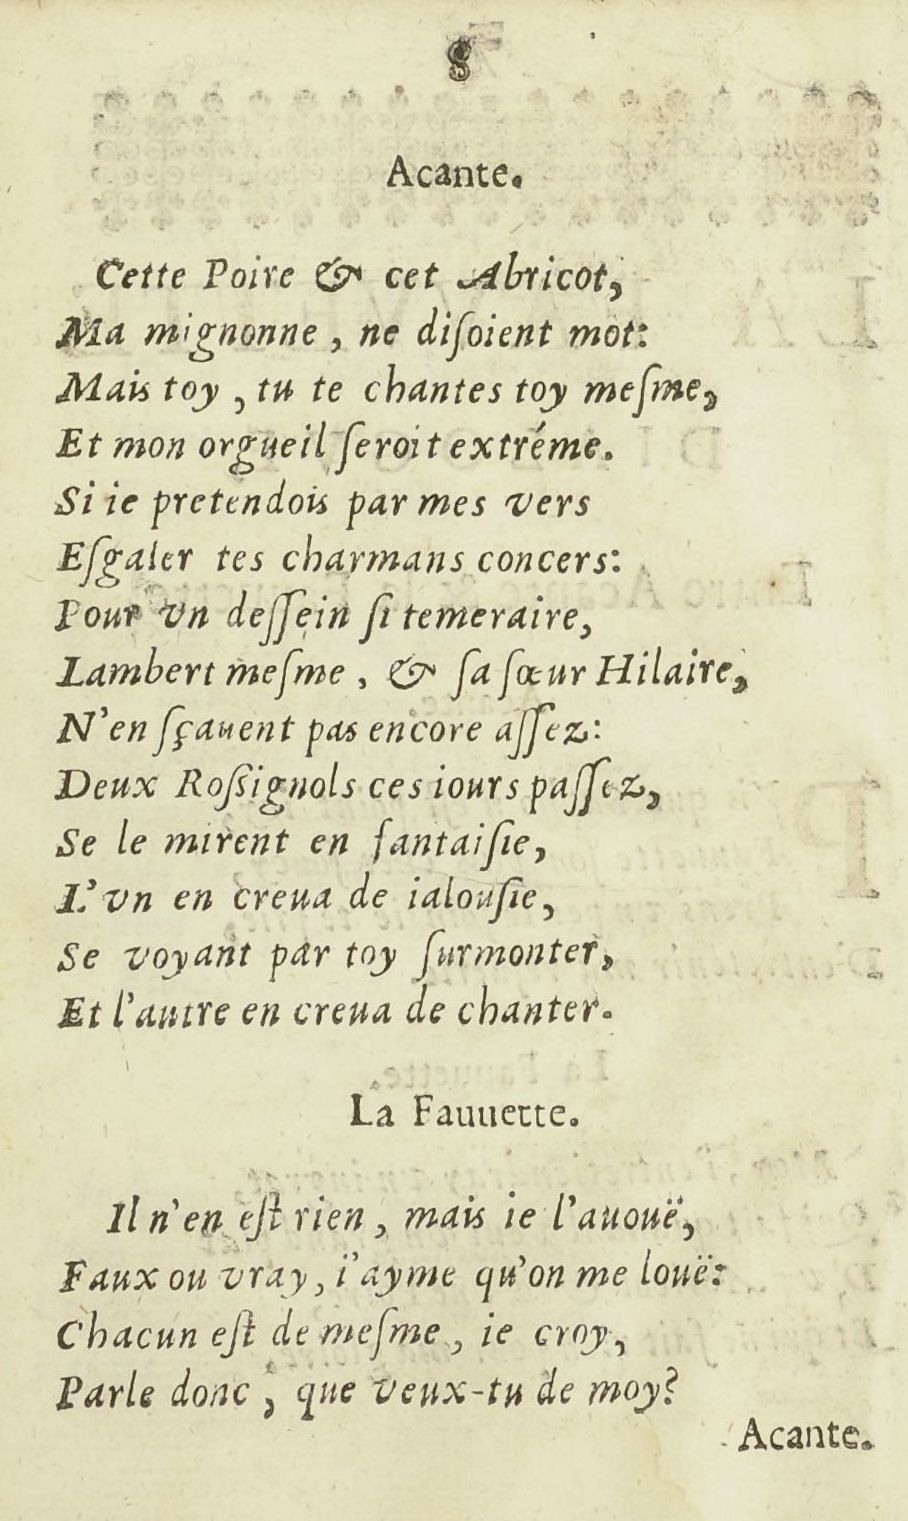

In [ ]:
#Je repasse en python
#J'importe une fonction qui me permet d'afficher les images
from IPython.display import Image
#J'affiche l'image que j'ai importée
Image("/content/img/10.jpg")

On peut binariser l'image

In [ ]:
#Je binarise en précisant
#le nom du fichier d'input (-i) et le format d'output (-o)
!kraken -I /content/img/10.jpg -o .png binarize

Binarizing	✓


Voilà le résultat

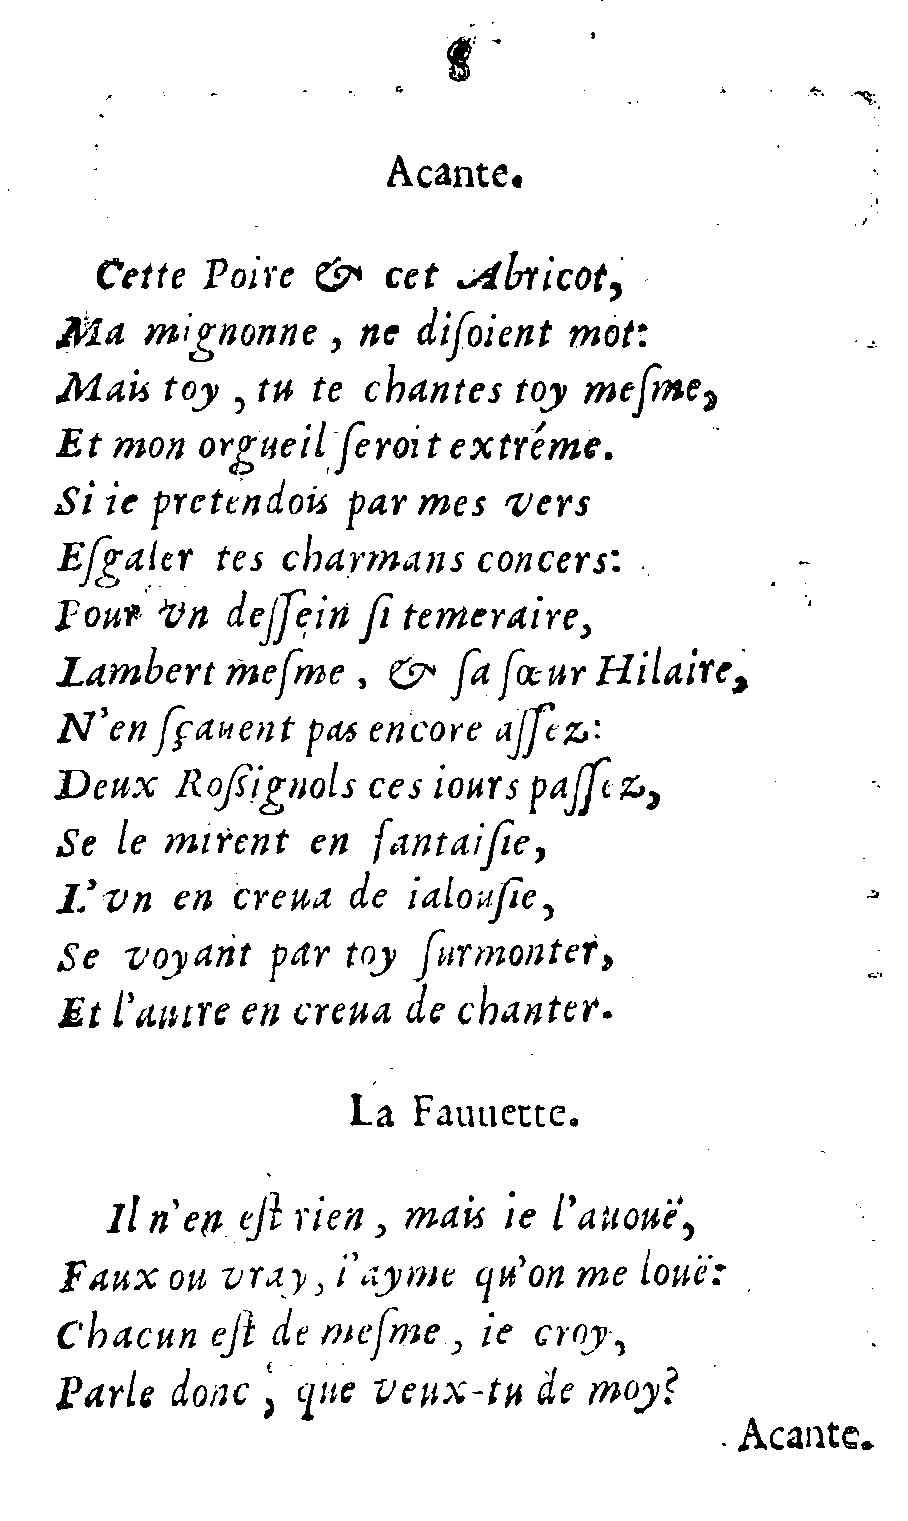

In [ ]:
#J'affiche l'image
Image("/content/img/10.png")

On peut segmenter l'image, c'est à dire extraire la position de chaque ligne, à l'intérieur desquelles on applique l'OCR.

In [ ]:
#Je binarise en indiquant l'input (-i) et l'output (-o)
#Le résultat est en format .json
!kraken -I /content/img/10.jpg -o .json binarize segment

Binarizing	✓
2020-06-20 21:32:39.204457: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Segmenting	✓


J'affiche le résultat de la segmentation (il s'agit d'une série de rectangles, définis par leurs quatre coins)


In [ ]:
#J'affiche le contenu du json
!cat /content/img/10.json

{"text_direction": "horizontal-lr", "boxes": [[396, 22, 501, 93], [386, 155, 522, 188], [96, 251, 647, 302], [55, 307, 647, 362], [55, 363, 716, 418], [55, 421, 612, 475], [53, 479, 589, 530], [56, 534, 648, 588], [54, 589, 590, 646], [55, 646, 747, 705], [56, 705, 610, 762], [53, 762, 659, 810], [208, 802, 283, 824], [55, 818, 544, 871], [55, 871, 553, 924], [56, 929, 632, 984], [57, 983, 611, 1029], [349, 1081, 577, 1127], [105, 1191, 693, 1243], [58, 1249, 749, 1303], [56, 1307, 624, 1366], [55, 1364, 715, 1414], [770, 86, 880, 118], [721, 1417, 873, 1452]], "script_detection": false}

Afin d'avoir une idée de ce que fait Kraken, je peux superposer la segmentation sur l'image

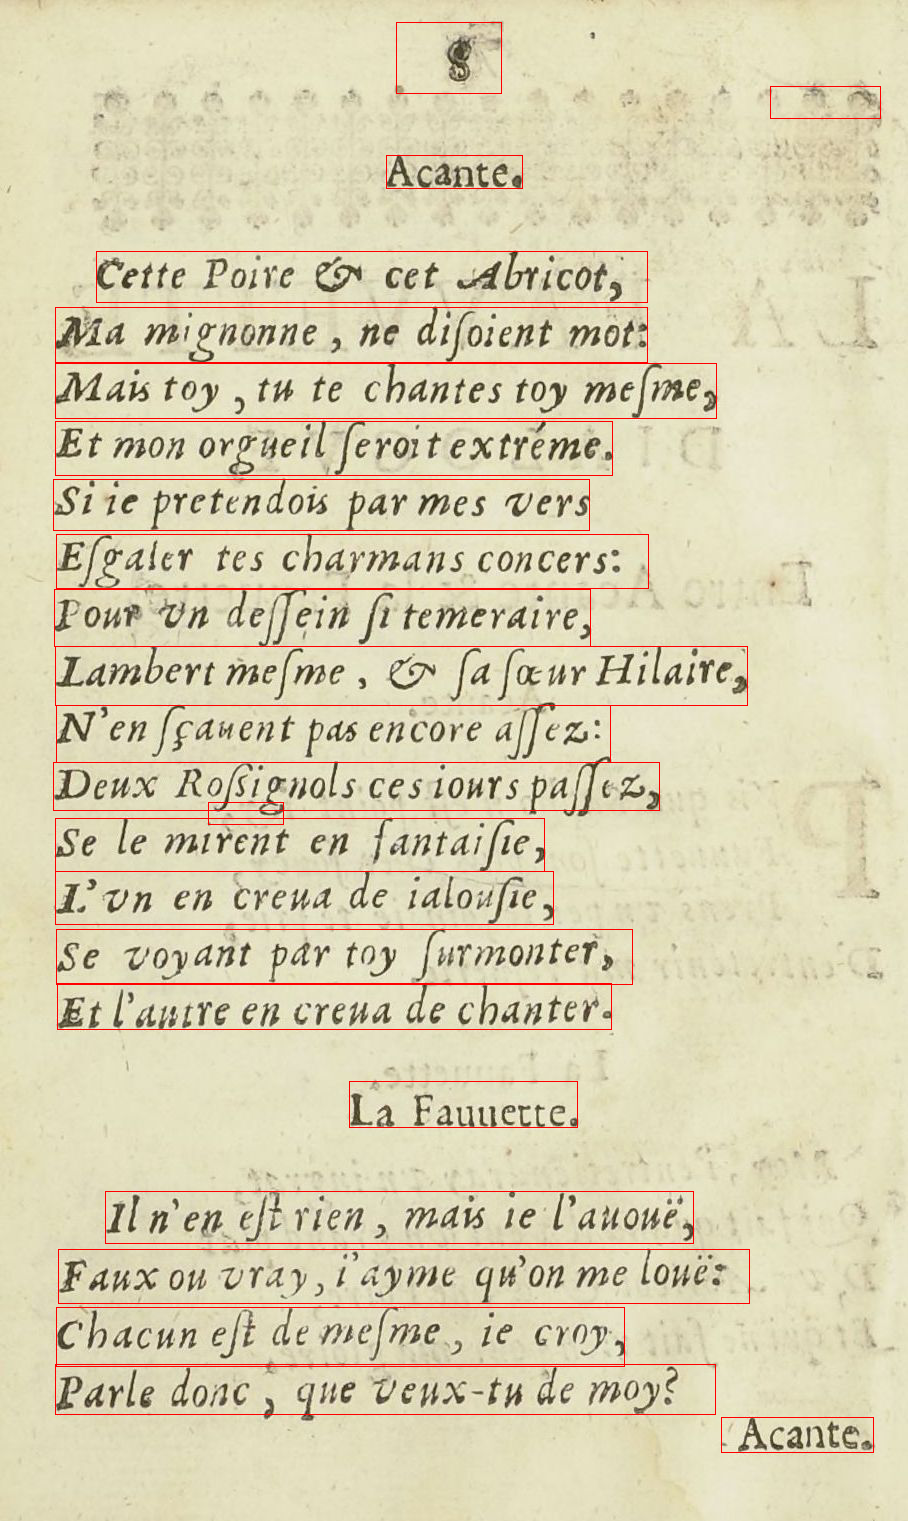

In [ ]:
#J'importe de nouvelles fonctions
from kraken import pageseg
from PIL import Image
from PIL import ImageDraw
#Je crée une variable qui contient une image
im=Image.open("/content/img/10.jpg")
#Je récupère la segmentation que je viens de faire
bounding_boxes=[[396, 22, 501, 93], [386, 155, 522, 188], [96, 251, 647, 302], [55, 307, 647, 362], [55, 363, 716, 418], [55, 421, 612, 475], [53, 479, 589, 530], [56, 534, 648, 588], [54, 589, 590, 646], [55, 646, 747, 705], [56, 705, 610, 762], [53, 762, 659, 810], [208, 802, 283, 824], [55, 818, 544, 871], [55, 871, 553, 924], [56, 929, 632, 984], [57, 983, 611, 1029], [349, 1081, 577, 1127], [105, 1191, 693, 1243], [58, 1249, 749, 1303], [56, 1307, 624, 1366], [55, 1364, 715, 1414], [770, 86, 880, 118], [721, 1417, 873, 1452]]
#Je peux dessiner la segmentation par dessus l'image en créant une fonction
def show_boxes(img):
    drawing_object=ImageDraw.Draw(img)
    #Pour ça je boucle sur chaque segment/ligne que j'ajoute à l'image
    for box in bounding_boxes:
        drawing_object.rectangle(box, fill = None, outline ='red')
    return img
#J'affiche l'image customisée
display(show_boxes(Image.open("/content/img/10.jpg")))

## 3 - Passer à l'échelle

Evidemment, on ne travaille pas avec une mais plusieurs images. Travaillons donc désormais à l'échelle d'un dossier contenant plusieurs images. Et pour ce faire, commencer par en télécharger de nouvelles

In [ ]:
#Je télécharge deux nouvelles images avec cURL
!curl https://raw.githubusercontent.com/gabays/Cours_Edition_Geneve/master/Cours_01/Cours_01_exo/img/Collectif1660_recueil_bpt6k853407j_11.jpg --output img/11.jpg
!curl https://raw.githubusercontent.com/gabays/Cours_Edition_Geneve/master/Cours_01/Cours_01_exo/img/Collectif1660_recueil_bpt6k853407j_12.jpg --output img/12.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  209k  100  209k    0     0   105k      0  0:00:01  0:00:01 --:--:--  104k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  193k  100  193k    0     0   174k      0  0:00:01  0:00:01 --:--:--  174k


Binariser les images dans le fichier ```src``` (les images produites seront toutes en `.png`)

In [ ]:
# J'efface l'image binarisée que j'ai faite précédemment
!rm /content/img/*png
# Je binarise toutes les images d'un coup
#en indiquant/le/chemin
#et avec *.png tous les fichiers (*) partageant une même extension (.png)
!kraken -I "/content/img/*.jpg" -o .png binarize
# on range les images
# Avec mkdir: je crée un sous dossier bin dans le dossier img
# Avec mv: je déplace tous les fichiers png dans le dossier bin que je viens de créer
!mkdir /content/img/bin; mv /content/img/*png /content/img/bin/

Binarizing	✓
Binarizing	✓
Binarizing	✓


Binariser puis segmenter les images dans le fichier ```img```

In [ ]:
#Je binarise puis je segmente tous les fichiers avec une extension png
!kraken -I "img/*jpg" -o .json binarize segment
# on crée un dossier seg pour y déplacer tous les fichiers json produits
!mkdir /content/img/seg; mv /content/img/*json /content/img/seg/

Binarizing	✓
2020-06-20 21:33:41.307665: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Segmenting	✓
Binarizing	✓
Segmenting	✓
Binarizing	✓
Segmenting	✓


In [ ]:
#Je binarise, je segmente et j'OCRise
!kraken -I "/content/img/*.jpg" -o .txt binarize segment ocr -m /content/material/OCR17.mlmodel
# on crée un dossier seg pour y déplacer toutes les transcriptions produites
!mkdir /content/img/txt; mv /content/img/*.txt /content/img/txt/

2020-06-20 21:34:12.259526: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpg2nwvdxn	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpcspi8_3i	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmp1ddnt3uw	✓


## 4 - Entrainer un modèle


### 4.1 - Créer la _GT_

Pour les données d'entraînement, on parle de _GT_ (_ground truth_). Afin de la générer, il nous faut créer une interface de transcription

In [ ]:
!ketos transcribe -o material/test.html /content/img/10.jpg

2020-06-20 21:34:39.998573: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Reading images  [####################################]  100%
Writing output✓


Téléchargez et ouvrez le fichier `test.html` dans un navigateur.

In [ ]:
from google.colab import files
files.download('/content/material/test.html')

Il est possible de gagner du temps, et de pré-remplir l'interface de transcription

In [ ]:
!ketos transcribe -o material/test_prefill.html --prefill /content/material/OCR17.mlmodel /content/img/10.jpg

2020-06-20 21:35:29.130483: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN✓
Reading images  [####################################]  100%
Writing output✓


Téléchargez et ouvrez le fichier `test_prefill.html` dans un navigateur. Corrigez la transcription et **sauvegardez en cliquant sur `download` en bas à gauche**.

In [ ]:
from google.colab import files
files.download('/content/material/test_prefill.html')

Maintenant il faut uploader le même fichier

In [ ]:
from google.colab import files
uploaded = files.upload()
!rm /content/material/test_prefill.html
!mv /content/test_prefill.html material/

mkdir: cannot create directory ‘material’: File exists


Saving test_prefill.html to test_prefill.html


Nous pouvons désormais extraire les données pour entraîner l'OCR

In [ ]:
!ketos extract --output gt/ /content/material/test_prefill.html

Reading transcriptions  [####################################]  100%


Nous avons créé un dossier `gt` composé de paires image/transcription
```
|-gt
  |-image_1
  |-transcription_1
  |-image_2
  |-transcription_2
  |-image_3
  |-transcription_3
  |-image_4
  |-transcription_4
```
Affichons la troisième image:


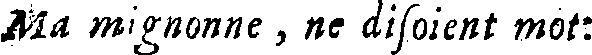

In [ ]:
from IPython.display import Image
Image("/content/gt/000003.png")

Affichons maintenant sa transcription, extraite de notre interface de transcription

In [ ]:
!cat /content/gt/000003.gt.txt

Ma mignonne, ne diſoient mot:

### 4.2 - Préparer l'entraînement

Nous avons besoin de trois jeux de données différents:
1. Des données pour entraîner notre modèle: ```train```
2. Des données pour contrôler l'efficacité des modèles successivement créés lors de l'entraînement: ```val```
3. Des données pour tester le meilleur modèle produit lors de l'entraînement sur des données qui n'ont pas été vues lors de l'entraînement: ```test```

```test``` peut contenir des données
1. _In-domain_ si elles proviennent des mêmes données que celles présentes dans le ```train``` et le ```val``` (par exemple d'autres lignes d'un **même** imprimé)
2. _Out-of-domain_ si elles proviennent d'une source différente de celles présentes dans le ```train``` et le ```val``` (par exemple d'autres lignes d'un **autre** imprimé)

Evidemment ces données _out-of-domain_ peuvent être plus ou moins éloignées de celles présentes dans dans ```train``` et ```val```: pour en entraînement sur des imprimés du XVIIe s. on peut utiliser des imprimés du XIXème s. français, du XXème s. allemand, voire japonais (même si l'intérêt va être limité)

Jean-Baptiste Camps (PSL-ENC) a écrit un script qui permet de créer ces jeux de données, que vous pouvez télécharger ici:

In [ ]:
!curl https://raw.githubusercontent.com/gabays/Cours_Edition_Geneve/master/Cours_01/Cours_01_exo/material/randomise_data.py --output /content/material/randomise_data.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   485  100   485    0     0   1321      0 --:--:-- --:--:-- --:--:--  1317


Lançons le script

In [ ]:
!python /content/material/randomise_data.py /content/gt/*.png

Trois fichiers apparaissent:
1. ```train```
2. ```val```
3. ```test```

### 4.3 - Créer le  modèle

On utilise le `train` pour l'entraînement, et `val` pour "guider" l'entraînement

Il est possible de faire une normalisation des caractère si cela n'a pas fait avant avec l'option ```-u NFD```. Cette option permet une normalisation unicode: les caractères sont décomposés par équivalence canonique et réordonnés: ```ñ``` (U+00F1) est ainsi la somme de ```n``` (U+006E) et ```~``` (U+0303). Il existe d'autres types de normalisation: NFC, NKFD… (cf [wikipedia](https://fr.wikipedia.org/wiki/Normalisation_Unicode))


In [ ]:
!ketos train -u NFD -t /content/test.txt -e /content/val.txt

2020-06-20 21:40:18.432993: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
[3.2016] alphabet mismatch: chars in training set only: {'.'} (not included in accuracy test during training) 
[3.2018] alphabet mismatch: chars in validation set only: {',', 'P', 'b', 'o', 'C', 'ſ', 'm', 'M', '&', 'd', 'g', ' ', 'r', 'i', ':'} (not trained) 
Initializing model ✓
Accuracy report (1) 0.0000 55 55
stage 2/∞  [####################################]  1/1Accuracy report (2) 0.0000 55 55
stage 3/∞  [####################################]  1/1Accuracy report (3) 0.0000 55 55
stage 4/∞  [####################################]  1/1Accuracy report (4) 0.0000 55 55
stage 5/∞  [####################################]  1/1Accuracy report (5) 0.0000 55 55
stage 6/∞  [####################################]  1/1Accuracy report (6) 0.0000 55 55

Moving best model model_1.mlmodel (0.0) to model_best.mlmodel


On fait un peu de nettoyage (je sauvegarde mon modèle et j'efface les autres)

In [ ]:
!cp /content/model_best.mlmodel /content/material/monModele.model
!rm -f /content/*.mlmodel

Il est aussi possible de faire du _fine-tuning_ d'un modèle existant

In [ ]:
 # On fait une sauvegarde
!cp /content/material/OCR17.mlmodel /content/material/OCR17.mlmodel.bk
#On entraine le modèle
!ketos train -i /content/material/OCR17.mlmodel --resize add /content/gt/*.png
#On saveugarde le nouveau modèle
!cp /content/model_best.mlmodel /content/material/monModeleFineTune.model
!rm -f /content/*.mlmodel

2020-06-20 21:43:15.768194: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading existing model from /content/material/OCR17.mlmodel✓[3.9004] alphabet mismatch: chars in training set only: {'v', '’', 'D', 'M', 'E', '̧', '́', 'p', 'g', 'R', 'I', '8', 's', 'ë', 'N', 'S', 'h', '.', ':', 'z', 'F'} (not included in accuracy test during training) 
[3.9007] alphabet mismatch: chars in validation set only: {'?', 'œ', 'P', 'H', 'b', '-', '&'} (not trained) 
stage 1/∞  [####################################]  19/19          Accuracy report (1) 0.9888 89 1
stage 2/∞  [####################################]  19/19          Accuracy report (2) 0.9663 89 3
stage 3/∞  [####################################]  19/19          Accuracy report (3) 0.9775 89 2
stage 4/∞  [####################################]  19/19          Accuracy report (4) 0.9663 89 3
stage 5/∞  [####################################]  19/19          Accuracy report 

Sauf spécification contraire, Kraken utilise l'_early stopping_ pour sélectionner le meilleur modèle (et éviter l'_overfitting_, cf.[wikipedia](https://fr.wikipedia.org/wiki/Surapprentissage))-


### 4.4 On évalue le modèle

In [ ]:
!ketos test -m /content/material/monModeleFineTune.model -e /content/test.txt >/content/eval_model.txt
#J'affiche le résultat du test
!cat eval_model.txt

2020-06-20 21:43:55.770190: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading model /content/material/monModeleFineTune.model	✓
Evaluating /content/material/monModeleFineTune.model
=== report  ===

7	Characters
0	Errors
100.00%	Accuracy

0	Insertions
0	Deletions
0	Substitutions

Count	Missed	%Right
6	0	100.00%	Latin
1	0	100.00%	Common

Errors	Correct-Generated

Average accuracy: 100.00%, (stddev: 0.00)


### 4.4 - OCRiser

Notre modèle est prêt! On peut désormais OCRiser un texte!


In [ ]:
!kraken -i /content/img/10.jpg /content/results/ocr_result_nouveauModele.txt binarize segment ocr -m /content/material/monModeleFineTune.model

2020-06-20 21:44:06.515396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmp51_40zgx	✓


Il existe plusieurs options d'export:
1. ```ocr -h``` pour un fichier hOCR

In [ ]:
!kraken -i /content/img/10.jpg /content/results/ocr_result_nouveauModele.html binarize segment ocr -h -m /content/material/monModeleFineTune.model

2020-06-20 21:44:28.185765: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpm077ewgq	✓


On peut télécharger le résultat pour voir à quoi il ressemble.

(Pensez à utiliser un éditeur comme `gedit` sur Ubuntu, `sublime` sur Mac ou `Notepad` sur Windows. Si vous n'en avez pas, ouvrez le document avec votre navigateur web et affichez le code source).

In [ ]:
from google.colab import files
files.download('/content/results/ocr_result_nouveauModele.html')

2. ```ocr -a``` pour un fichier ALTO

In [ ]:
!kraken -i /content/img/10.jpg /content/results/ocr_result_nouveauModele.xml binarize segment ocr -a -m /content/material/monModeleFineTune.model
files.download('/content/results/ocr_result_nouveauModele.xml')

2020-06-20 21:46:01.220481: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpgdl5_i4c	✓
